# STM Dataset Simulation and Refactor

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta
import random
import math

## Datasets
### hour.csv

This csv file contains the information of the number of trips that ended in a specific time hour.

- season:
    - 1: Winter,
    - 2: Spring,
    - 3: Summer
    - 4: Fall
- year:
    - 0: 2011,
    - 1: 2012
- month: 1 - January to 12 - December
- hr: 0 to 23
- holiday:
    - 1: holiday
    - 0: normal work/week day
- weekday: 1 - Monday to 7 - Sunday
- workingday:
    - 0: weekend and holiday
    - 1: work day
- weathersit:
    - 1: Clear, Few Clowds, Partly Cloudy, 
    - 2: Mist and Cloudy, Mist and Broken clouds, Mist and Few clouds, Mist, 
    - 3: Light Snow, Light Rain and Thunderstorm and Scattered clouds, Light Rain and Scattered clouds, 
    - 4: Heavy Rain and Ice Pallets and Thunderstorm and Mist, Snow and Fog
- cnt: number of ended trips

It also contians a simple weather report for that hour, with:
- temperature
- temperature feeling
- humidity
- windspeed

### stations.csv

This csv file contains the information of the stations we will use to simulate the trips.

In [2]:
data = pd.read_csv("./hour.csv")
data = data.dropna().drop(columns=["instant", "registered", "casual"])
data.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
stations = pd.read_csv("./stationshour.csv").sort_values(by=["Station ID"])[:40]
stations.head()

,Station ID,Capacity,Latitude,Longitude,Station Name
0,1,19,51.529163,-0.109970,"River Street , Clerkenwell"
1,2,37,51.499606,-0.197574,"Phillimore Gardens, Kensington"
2,3,32,51.521283,-0.084605,"Christopher Street, Liverpool Street"
3,4,23,51.530059,-0.120973,"St. Chad's Street, King's Cross"
4,5,27,51.493130,-0.156876,"Sedding Street, Sloane Square"


In [6]:
def random_date(start):
    ind = random.randint(1,59)
    return datetime(start.year, start.month, start.day, start.hour, ind, start.second)

def calculate_distance(start, end):
    x = math.sin(start[2]) * math.sin(end[2]) + math.cos(start[2]) * math.cos(end[2]) * math.cos(end[3] - start[3])
    return math.acos(x) * 6371  # returns meters

trips = []

count = 1
for hour in data.values:
    for trip in range(hour[-1]):
        station_start = random.choice(stations.values)
        station_end = random.choice(stations.values)
        distance = calculate_distance(station_start, station_end)
        time_travelling = (distance * random.randint(10,100)) / (20000 / 60)    # distance * randint to simulate a normal travel
        hour_date = hour[0].replace("-", "/")
        end_date_trip = random_date(datetime.strptime(f"{hour_date} {hour[4]:02d}:00:00", "%Y/%m/%d %H:%M:%S"))
        start_date_trip = end_date_trip - timedelta(minutes=int(time_travelling))
        trips.append({"ID": count, "StartStationID": station_start[0], "EndStationID": station_end[0], "Duration": int(time_travelling), "StartDate": start_date_trip, "EndDate": end_date_trip})
        count += 1

trips = pd.DataFrame(trips, columns=["ID", "StartStationID", "EndStationID", "Duration", "StartDate", "EndDate"])
trips.head()

,ID,StartStationID,EndStationID,Duration,StartDate,EndDate
0,1,39,32,2,2011-01-01 00:55:00,2011-01-01 00:57:00
1,2,13,5,11,2011-01-01 00:28:00,2011-01-01 00:39:00
2,3,21,27,32,2010-12-31 23:39:00,2011-01-01 00:11:00
3,4,12,13,3,2011-01-01 00:07:00,2011-01-01 00:10:00
4,5,5,6,22,2011-01-01 00:07:00,2011-01-01 00:29:00


In [10]:
data.to_csv("../CSVFiles/data.csv")
stations.to_csv("../CSVFiles/stations.csv")
# for github upload
trips[:int(len(trips.values)/3)].to_csv("../CSVFiles/trips1.csv")
trips[int(len(trips.values)/3):int(len(trips.values)*2/3)].to_csv("../CSVFiles/trips2.csv")
trips[int(len(trips.values)*2/3):].to_csv("../CSVFiles/trips3.csv")

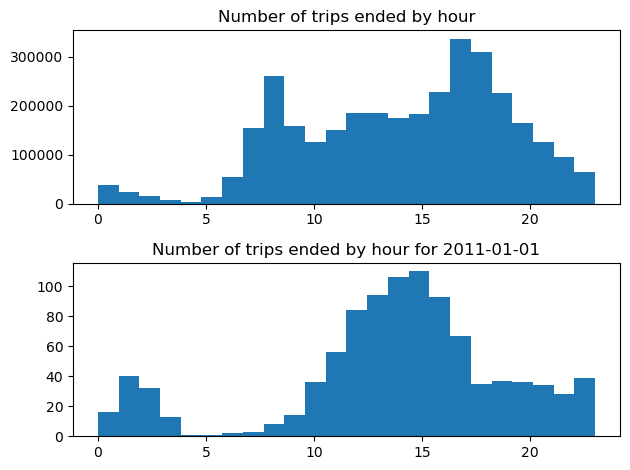

In [8]:
hours = {x:0 for x in range(0,24)}
hours_24 = hours.copy()

count = 0
for t in data.values:
    hours[t[4]] += t[-1]
    if count < 24:
        hours_24[t[4]] += t[-1]
    count += 1

fig, axs = plt.subplots(2)

axs[0].hist(list(range(0,24)), len(hours), weights=list(hours.values()))
axs[0].set_title("Number of trips ended by hour")

axs[1].hist(list(range(0,24)), 24, weights=list(hours_24.values()))
axs[1].set_title(f"Number of trips ended by hour for {data.values[0][0]}")

fig.tight_layout()